# 🧠 Task: Neural Networks with TensorFlow/Keras (Image Classification)

## 🔍 Objective:
To build and train a simple **feed-forward neural network** using TensorFlow/Keras to classify data (either images or structured input). We'll use the **MNIST dataset** — a popular dataset of handwritten digits (0–9) — for this task.

## 🧾 1. What is a Neural Network?

A **neural network** is a model inspired by the human brain that consists of layers of neurons:
- **Input layer**: Takes raw data (e.g., pixel values)
- **Hidden layers**: Learn abstract features from data
- **Output layer**: Makes predictions (e.g., probability of digit)

Each neuron computes a weighted sum of inputs, passes it through an **activation function**, and forwards it to the next layer.

---

## 📚 2. Dataset - MNIST

The **MNIST dataset** consists of:
- 60,000 training images
- 10,000 testing images
- Each image is 28x28 pixels grayscale of digits (0 to 9)

The task is to correctly classify each image into the correct digit.


In [ ]:
# Import Libraries

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset (already split into training and testing sets)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Check shapes
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


## 🔄 3. Preprocessing Steps

1. **Normalize pixel values** to the range 0–1 by dividing by 255.
2. **Flatten** the 28x28 images into 1D arrays (shape becomes 784).
3. **One-hot encode** the target labels (0–9) into 10-length binary vectors.


In [ ]:
# Data Preprocessing:

# Normalize pixel values (0–255) to range 0–1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Flatten 28x28 images into 784-element vectors
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

# One-hot encode the labels (0 to 9)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


## 🧱 4. Neural Network Architecture

We'll build a **feed-forward fully connected neural network** (also called Dense layers):

- Input Layer: 784 neurons (28x28)
- Hidden Layer 1: 128 neurons with **ReLU** activation
- Hidden Layer 2: 64 neurons with **ReLU**
- Output Layer: 10 neurons with **softmax** activation (for 10 digit classes)

---

## 🎯 5. Activation Functions

- **ReLU (Rectified Linear Unit)**: Outputs max(0, x), good for hidden layers.
- **Softmax**: Converts outputs to probabilities summing to 1 — used for multi-class classification.


In [ ]:
# Build the model:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create the model
model = Sequential([
    Dense(128, input_shape=(784,), activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 output classes
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model:

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## ⚙️ 6. Training the Model

- Loss Function: `categorical_crossentropy`
- Optimizer: `adam` (adaptive learning rate)
- Metrics: `accuracy`
- Epochs: Number of full passes through the dataset.
- Batch Size: Number of samples processed before updating model weights.


In [ ]:
# Train the model:

# Fit the model to the data
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8637 - loss: 0.4685 - val_accuracy: 0.9597 - val_loss: 0.1419
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9634 - loss: 0.1223 - val_accuracy: 0.9679 - val_loss: 0.1067
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9755 - loss: 0.0776 - val_accuracy: 0.9693 - val_loss: 0.1015
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9829 - loss: 0.0562 - val_accuracy: 0.9703 - val_loss: 0.1019
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9872 - loss: 0.0429 - val_accuracy: 0.9718 - val_loss: 0.0969
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9895 - loss: 0.0335 - val_accuracy: 0.9726 - val_loss: 0.1067
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9904 - loss: 0.0288 - val_accuracy: 0.9755 - val_loss: 0.0989
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9935 - loss: 0.018

## 📈 7. Evaluating the Model

After training, we evaluate the model using:
- **Accuracy**: Overall correctness
- **Loss**: How far off the predictions are

We also plot:
- **Accuracy vs. Epochs**
- **Loss vs. Epochs**


In [ ]:
# Evaluate the model:

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_accuracy:.2f}")
print(f"Test Loss: {test_loss:.2f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9731 - loss: 0.1115

Test Accuracy: 0.98
Test Loss: 0.09


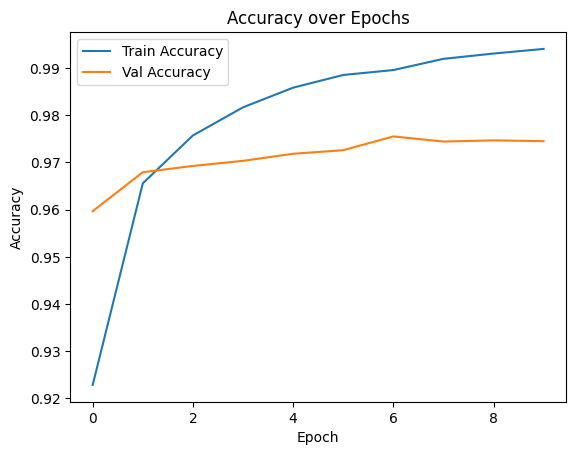

In [ ]:
# Plot accuracy and loss curves:

# Plot training vs validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


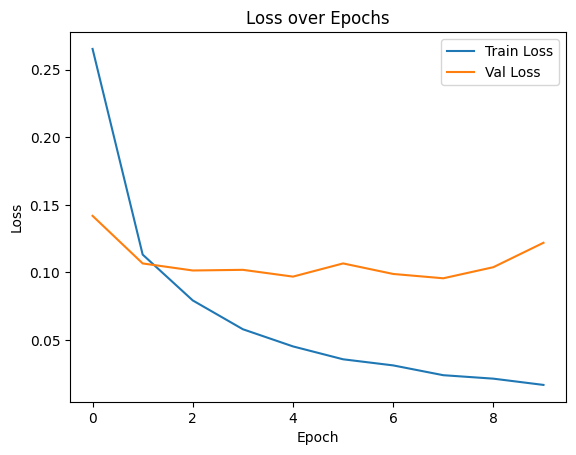

In [ ]:
# Plot training vs validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


## 🔁 8. Hyperparameter Tuning

Some hyperparameters we can try tweaking:
- Learning rate of the optimizer
- Number of layers or neurons
- Epochs
- Batch size
- Dropout (to prevent overfitting)

---

## 📌 Summary

This task demonstrates the basics of building a neural network for classification using TensorFlow/Keras. While MNIST is an image dataset, the same concepts apply to structured tabular data as well.
